In [ ]:
#Done by Faith Sang.................
#Importing the MNIST dataset with load_digits
from sklearn.datasets import load_digits
#Importing the KNeighborsClassifier  module
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score
import pandas as pd
import numpy as np
from skimage import exposure
from google.colab.patches import cv2_imshow
import sklearn
import matplotlib as mplt
import matplotlib.pyplot as plt
#This line will force Grapghs on to the Notebook
%matplotlib inline

In [ ]:
#Loading the MNIST dataset
mnist = load_digits()

#Converting the dataset to a dataframe
df = pd.DataFrame(mnist.data)

In [ ]:
#Done by Franciscah Mwende...............
#Displaying the first 5 rows
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1797 non-null   float64
 1   1       1797 non-null   float64
 2   2       1797 non-null   float64
 3   3       1797 non-null   float64
 4   4       1797 non-null   float64
 5   5       1797 non-null   float64
 6   6       1797 non-null   float64
 7   7       1797 non-null   float64
 8   8       1797 non-null   float64
 9   9       1797 non-null   float64
 10  10      1797 non-null   float64
 11  11      1797 non-null   float64
 12  12      1797 non-null   float64
 13  13      1797 non-null   float64
 14  14      1797 non-null   float64
 15  15      1797 non-null   float64
 16  16      1797 non-null   float64
 17  17      1797 non-null   float64
 18  18      1797 non-null   float64
 19  19      1797 non-null   float64
 20  20      1797 non-null   float64
 21  21      1797 non-null   float64
 22  

In [ ]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
type(mnist)

sklearn.utils.Bunch

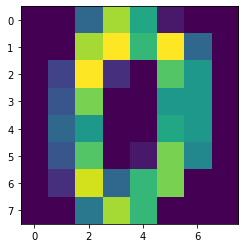

In [ ]:
#Done by Felix Obuya............
#Visualizing the first image
plt.imshow(mnist.images[0]);

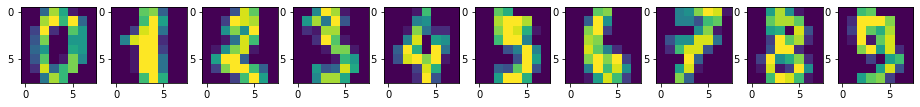

In [ ]:
# dispalying the images of the first ten digits
fig, axes  = plt.subplots(1, 10,figsize=(16,16))
for i in range(10):
    axes[i].imshow(mnist.images[i]);

In [ ]:
#Done by Samuel Muthebwa..........
# SPlitting testin and trainin data using the train_test_split function
# 75% of the data will be for training and 25% for testing
(X_train, Y_test, X_TrainLabels, Y_TestLabels) = train_test_split(np.array(mnist.data),mnist.target, test_size=0.25, random_state=42)
# 15% of the training data will be set aside for validation purposes 
(X_trainData, x_valData, X_trainLabels, x_valLabels) = train_test_split(X_train, X_TrainLabels,test_size=0.15, random_state=84)

In [ ]:

kNeighbors = range(2, 30)
allscores = []
allks=[]
for k in range(2,20):
    model = KNN(n_neighbors=k)
    model.fit(X_trainData, X_trainLabels)
    score = model.score(x_valData, x_valLabels)
    allscores.append(score* 100)
    allks.append(k)
    print("Number of k neighbors = %d --> Accuracy=%.2f%%" % (k, score * 100))
maxScore = max(allscores)
indexmaxSCore = allscores.index(maxScore)
bestKVal = allks[indexmaxSCore]
print("The best value of K neighbors is %d " %(bestKVal))

Number of k neighbors = 2 --> Accuracy=98.52%
Number of k neighbors = 3 --> Accuracy=99.01%
Number of k neighbors = 4 --> Accuracy=98.03%
Number of k neighbors = 5 --> Accuracy=99.01%
Number of k neighbors = 6 --> Accuracy=99.01%
Number of k neighbors = 7 --> Accuracy=99.01%
Number of k neighbors = 8 --> Accuracy=98.52%
Number of k neighbors = 9 --> Accuracy=98.52%
Number of k neighbors = 10 --> Accuracy=98.52%
Number of k neighbors = 11 --> Accuracy=98.52%
Number of k neighbors = 12 --> Accuracy=98.52%
Number of k neighbors = 13 --> Accuracy=98.52%
Number of k neighbors = 14 --> Accuracy=98.52%
Number of k neighbors = 15 --> Accuracy=98.52%
Number of k neighbors = 16 --> Accuracy=98.52%
Number of k neighbors = 17 --> Accuracy=98.52%
Number of k neighbors = 18 --> Accuracy=98.03%
Number of k neighbors = 19 --> Accuracy=98.52%
The best value of K neighbors is 3 


In [ ]:
model = KNN(n_neighbors=3)
model.fit(X_train, X_TrainLabels)
predictions = model.predict(Y_test)
print("EVALUATION ON TESTING DATA")
print(classification_report(Y_TestLabels, predictions))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      1.00      0.99        37
           2       1.00      1.00      1.00        38
           3       0.98      1.00      0.99        46
           4       0.98      1.00      0.99        55
           5       0.98      1.00      0.99        59
           6       1.00      1.00      1.00        45
           7       1.00      0.98      0.99        41
           8       0.97      0.97      0.97        38
           9       0.98      0.92      0.95        48

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



In [ ]:
#Done by Brian Gudah...........
# grab the image and classify it 
image = mnist.images[4]
prediction = model.predict(image.reshape(1, -1))[0]

# convert the image for a 64-dim array to an 8 x 8 image compatible with OpenCV,
# then resize it to 32 x 32 pixels so we can see it better
image = image.reshape((8, 8)).astype("uint8")

# # show the prediction
print("I think that digit is: {}".format(prediction))
cv2_imshow(image)

I think that digit is: 4
